In [1]:
# !pip3 install tensorly --quiet
# !pip3 install tensorflow --quiet
#!pip3 install openpyxl --quiet
#!pip3 install statsmodels --quiet
#!pip3 install matplotlib --quiet
#!pip3 install seaborn
# !pip3 install plotly==5.11.0 --quiet

You should consider upgrading via the 'f:\repository\major_project\env\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import tensorly as tl
import tensorflow as tf
from tensorly.decomposition import non_negative_tucker as tucker
from tensorly.decomposition import non_negative_tucker_hals as tucker_hal
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,6
import matplotlib.pyplot as plt
from tensorly.metrics.regression import RMSE
# import plotly.plotly as py
import plotly.graph_objects as go


In [413]:
data_file = ['data\DVG_April.xlsx','data\DVG_May.xlsx' , 'data\DVG_June.xlsx' , 'data\DVG_July.xlsx' , 'data\DVG_Aug.xlsx' , 'data\DVG_Sep.xlsx']

## Function to preprocess data for tensor decomposition

In [414]:
def getFinalData(dataSheet):
    df_total = []
    for data in dataSheet:
        print(data,"is processing...")
        df = pd.read_excel(data,sheet_name=1)
        df_total.append(df)
    result = pd.concat(df_total)
    return result

In [415]:
df_final = getFinalData(data_file)

data\DVG_April.xlsx is processing...
data\DVG_May.xlsx is processing...
data\DVG_June.xlsx is processing...
data\DVG_July.xlsx is processing...
data\DVG_Aug.xlsx is processing...
data\DVG_Sep.xlsx is processing...


In [429]:
tensor_dec = df_final[["Hour","MONTHLY","DAILY","ORIGIN","DESTINATION"]]

In [430]:
tensor_dec.drop(tensor_dec[tensor_dec["Hour"] <=6].index , inplace=True)
tensor_dec.drop(tensor_dec[tensor_dec["Hour"] >=21].index , inplace=True)

C:\Users\HIMANGSHUB\AppData\Local\Temp\ipykernel_5240\353581905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tensor_dec.drop(tensor_dec[tensor_dec["Hour"] <=6].index , inplace=True)
C:\Users\HIMANGSHUB\AppData\Local\Temp\ipykernel_5240\353581905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tensor_dec.drop(tensor_dec[tensor_dec["Hour"] >=21].index , inplace=True)


In [ ]:
tensor_dec.to_csv("data\FINAL_DATA.csv")

In [5]:
tensor_data = pd.read_csv("data/FINAL_DATA.csv")
tensor_data = tensor_data.iloc[:,1:]

In [6]:
mon = 6
day = 1
hr = 10
for h in range(7,21):
    for stop in range(101,152):
        tensor_data.loc[len(tensor_data.index)] = [h,mon,day,stop,stop] 

for d in range(1,8):
    for stop in range(101,152):
        tensor_data.loc[len(tensor_data.index)] = [hr,mon,d,stop,stop]

In [7]:
tensor_data.to_csv("data\FINAL_DATA.csv")

- Function to get the count of unique trips 

In [132]:
# group = ['Hour','ETD_CUR_STO','ETD_DST_STO']
# def tensor_preprocess(dataset , group):
#     groups = dataset.groupby(group)
#     tensor_list = []
#     for it , df in groups:
#         lst = []
#         lst.append([it[0], it[1] , it[2] , len(df)])
#         tensor_list.append(lst)
#     tensor = tl.convert_to_tensor(tensor_list)
#     return tensor

# TENSOR DECOMPOSITION

In [10]:
tensor_data = pd.read_csv("data/FINAL_DATA.csv")
tensor_data = tensor_data.iloc[:,1:]

In [16]:
tensor_data.shape

(4219699, 5)

In [6]:
# mon = 6
# day = 1
# hr = 10
# for h in range(7,21):
#     for stop in range(101,152):
#         tensor_data.loc[len(tensor_data.index)] = [h,mon,day,stop,stop] 

# for d in range(1,8):
#     for stop in range(101,152):
#         tensor_data.loc[len(tensor_data.index)] = [hr,mon,d,stop,stop]

In [422]:
# tensor_data.loc[len(tensor_data.index)] = [5,6,1, 137, 137] 

In [1]:
# tensor_data['Hour'].value_counts()

In [17]:
# (tensor_data["ORIGIN"] == tensor_data["DESTINATION"]).value_counts()

- Hourly NTD

In [213]:
# groups = tensor_data.groupby(['Hour','ORIGIN','DESTINATION'])
# tensor_list = []
# for it , df in groups:
#     tensor_list.append([it[0], it[1] , it[2], len(df)])
# df_dummy = pd.DataFrame(tensor_list , columns=['Hour','Origin','Destination','Trip_Count'])

In [200]:
# gp = df_dummy.groupby(['Hour'])
# test_df = pd.DataFrame()

In [409]:

# for i , df in gp:
#     test_df = df

# test_df.pivot_table(index='Origin',columns='Destination',values='Trip_Count').fillna(0)

In [205]:

# for w in test_df["Origin"]:
#     if w not in lst:
#         print(w)

In [114]:
# frame = df_dummy.pivot_table(index='Origin',columns='Destination',values='Trip_Count')

In [350]:
# frame.fillna(0)

In [77]:
# hourly = tensor_data[["Hour","ORIGIN","DESTINATION"]]
# ten = tl.tensor(hourly,dtype='float64')
# core_hr , factor_hr = tucker(ten,init='random', rank=[3,3])

- Daily NTD

In [ ]:
# daily = tensor_data[["Hour","ORIGIN","DESTINATION"]]
# ten = tl.tensor(daily)
# ten.shape
# core_weekday , factor_weekday = tucker(ten,rank=[8,8,5])

- Monthly NTD

In [425]:
# def remove_same_od_count(df):
#     df.loc[df['Origin'] == df['Destination'], 'Trip_Count'] = 0
#     return df

In [340]:
# ['MONTHLY','ORIGIN','DESTINATION']
# def NTD_data_prepare(tensor_data , time):
#     month = tensor_data[[time,'ORIGIN','DESTINATION']]
#     grp_month = month.groupby([time,'ORIGIN','DESTINATION'])
#     tensor_list_month = []
#     for it , df in grp_month:
#         tensor_list_month.append([it[0], it[1] , it[2], len(df)])
#     monthly = pd.DataFrame(tensor_list_month , columns=[time,'Origin','Destination','Trip_Count'])
    
#     #Remove same origin-destination count
#     monthly_data = remove_same_od_count(monthly)
    
#     month_grp = monthly_data.groupby([time])
#     month_tensor_data = []

#     for i,df in month_grp:
#         pivot_table_for_month = df.pivot_table(index='Origin',columns='Destination',values='Trip_Count').fillna(0)
#         month_tensor_data.append(tl.tensor(pivot_table_for_month))
#     ten = tf.convert_to_tensor(month_tensor_data)
#     core_month , factor_month = tucker(ten,rank=[8,8,5])
#     return core_month,factor_month

In [445]:
# core , factor = NTD_data_prepare(tensor_data,'MONTHLY')

- Rough code

In [310]:
# month = tensor_data[['MONTHLY','ORIGIN','DESTINATION']]
# grp_month = month.groupby(['MONTHLY','ORIGIN','DESTINATION'])
# tensor_list_month = []
# for it , df in grp_month:
#     tensor_list_month.append([it[0], it[1] , it[2], len(df)])
# monthly_data = pd.DataFrame(tensor_list_month , columns=['Monthly','Origin','Destination','Trip_Count'])
# monthly_data.loc[len(monthly_data.index)] = [6, 137, 137,0] 

In [469]:
# month_grp = monthly_data.groupby(['Monthly'])
# month_tensor_data = []

# for i,df in month_grp:
#     pivot_table_for_month = df.pivot_table(index='Origin',columns='Destination',values='Trip_Count').fillna(0)
#     month_tensor_data.append(tl.tensor(pivot_table_for_month))


In [313]:
# ten = tf.convert_to_tensor(month_tensor_data)
# core_month , factor_month = tucker(ten,rank=[8,8,5])

In [12]:
# core_month.shape

In [13]:
# factor_month[0].shape

In [14]:
# factor_month[1].shape

In [15]:
# factor_month[1].shape

#### FUNCTION FOR GETTING CORE AND FACTORS FOR EACH TIME FRAME

In [8]:
def remove_same_od_count(df,time):
    df.loc[df['Origin'] == df['Destination'], 'Trip_Count'] = 0
    if(time=='Hour'):
        df['Trip_Count'] = df['Trip_Count']/(30*6+3)
    if(time == 'DAILY'):
        # 1-> 4+5+4+5+4+4
        # 2-> 4+5+4+4+5+4
        # 3-> 4+5+4+4+5+4
        # 4-> 4+4+5+4+5+4
        # 5-> 4+4+5+4+4+5
        # 6-> 5+4+4+5+4+5
        # 7-> 5+4+4+5+4+4
        df['Trip_Count'] = df['Trip_Count']/(4*4 + 5*2)
    return df

In [9]:
def NTD_data_prepare(tensor_data , time):
    month = tensor_data[[time,'ORIGIN','DESTINATION']]
    grp_month = month.groupby([time,'ORIGIN','DESTINATION'])
    tensor_list_month = []
    for it , df in grp_month:
        tensor_list_month.append([it[0], it[1] , it[2], len(df)])
    monthly = pd.DataFrame(tensor_list_month , columns=[time,'Origin','Destination','Trip_Count'])
    
    #Remove same origin-destination count
    monthly_data = remove_same_od_count(monthly,time)
    
    month_grp = monthly_data.groupby([time])
    month_tensor_data = []

    for i,df in month_grp:
        pivot_table_for_month = df.pivot_table(index='Origin',columns='Destination',values='Trip_Count').fillna(0)
        month_tensor_data.append(tl.tensor(pivot_table_for_month))
    ten = tf.convert_to_tensor(month_tensor_data)
    return ten


In [472]:
# tensor_data
# gp = tensor_data.groupby(['DAILY','MONTHLY'])
# for i,df in gp:
#     print(i , '-->',len(df))
# tensor_data[['DAILY','MONTHLY']].value_counts()
# month = tensor_data[['DAILY','ORIGIN','DESTINATION']]
# grp_month = month.groupby(['DAILY','ORIGIN','DESTINATION'])
# tensor_list_month = []
# for it , df in grp_month:
#     tensor_list_month.append([it[0], it[1] , it[2], len(df)])
# t = pd.DataFrame(tensor_list_month , columns=['DAILY','Origin','Destination','Trip_Count'])
# t
# t['DAILY'].value_counts()
# month_grp = t.groupby(['Hour'])
# month_tensor_data = []

# for i,df in month_grp:
#     print(i)
#     pivot_table_for_month = df.pivot_table(index='Origin',columns='Destination',values='Trip_Count').fillna(0)
#     break
#     # month_tensor_data.append(tl.tensor(pivot_table_for_month))
# #tf.convert_to_tensor(month_tensor_data)
# pivot_table_for_month

## Function to get export the core and factor into csv

In [261]:
def get_Core_factor(factor,name1,name2,name3):
    fc_0 = pd.DataFrame(factor[0])
    fc_1 = pd.DataFrame(factor[1])
    fc_2 = pd.DataFrame(factor[2])
    fc_0.to_csv(name1)
    fc_1.to_csv(name2)
    fc_2.to_csv(name3)

## Function to get the optimised rank using RMSE

In [264]:
def optimised_rank(data):
    rank = []
    rmse = []
    for r1 in range(2,10):
        for r2 in range(2,10):
            for r3 in range(2,10):
                core1 , error = tucker(data,rank=[r1,r2,r3],return_errors=True)
                tucker_reconstruction_mu = tl.tucker_to_tensor(core1)
                er = RMSE(data, tucker_reconstruction_mu)
                rmse.append(er)
                rank.append( str(r1)+','+str(r2)+','+str(r3))
    
    dc = {'rank':rank , 'rmse':rmse}
    h = pd.DataFrame(dc)
    h = h.sort_values('rmse',ascending=False)
    return h

### HOURLY

In [248]:
tensor_final_1 = NTD_data_prepare(tensor_data,'Hour')

C:\Users\HIMANGSHUB\AppData\Local\Temp\ipykernel_13700\3397584672.py:15: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



In [246]:
# rank = []
# rmse = []
# for r1 in range(2,10):
#     for r2 in range(2,10):
#         for r3 in range(2,10):
#             core1 , error = tucker(tensor_final_1,rank=[r1,r2,r3],return_errors=True)
#             tucker_reconstruction_mu = tl.tucker_to_tensor(core1)
#             er = RMSE(tensor_final_1, tucker_reconstruction_mu)
#             rmse.append(er)
#             rank.append( str(r1)+','+str(r2)+','+str(r3))

# dc = {'rank':rank , 'rmse':rmse}
# h = pd.DataFrame(dc)
# h = h.sort_values('rmse',ascending=False)
# h.tail(1)
# h[h['rank']=='3,9,9']
# h.tail(10)

In [269]:
rank_rmse_h = optimised_rank(tensor_final_1)
core1 , factor1 = tucker(tensor_final_1,rank=[3,9,9],normalize_factors=True)
get_Core_factor(factor1,'data_final/factor0_hourly.csv' , 'data_final/factor1_hourly.csv' , 'data_final/factor2_hourly.csv')

Text(0.5, 1.0, 'The lowest RMSE score rank is [3,9,9]')

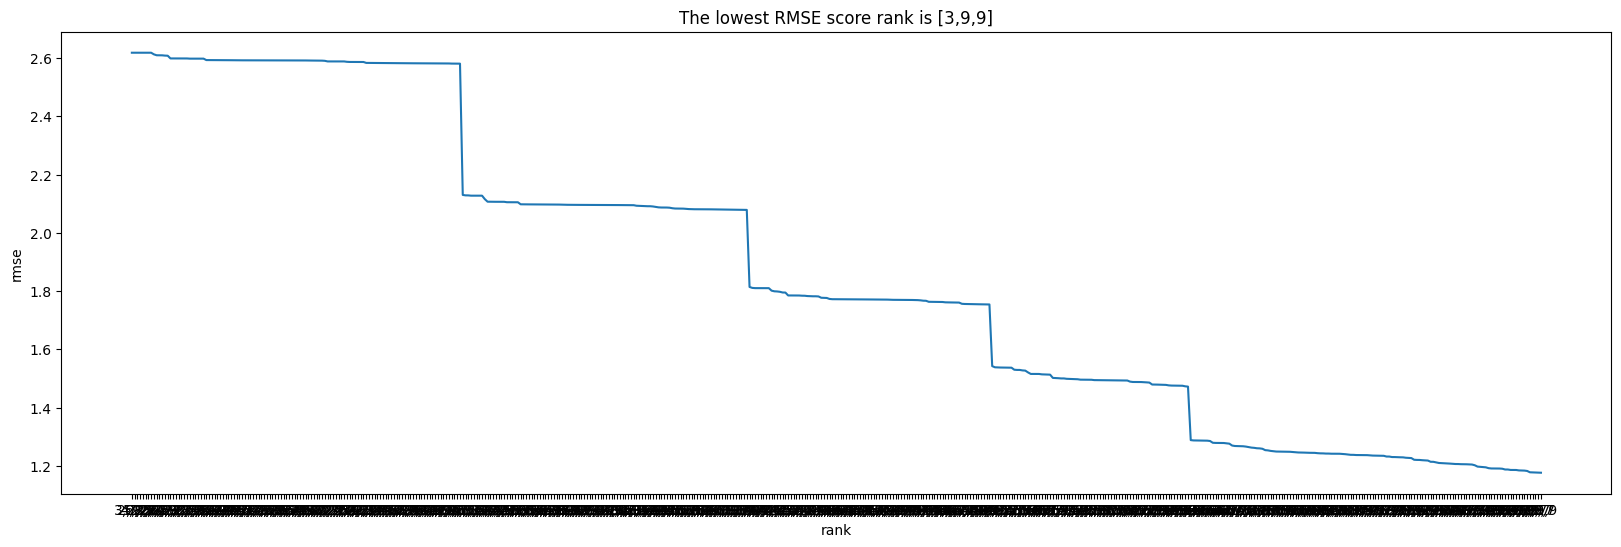

In [267]:
sns.lineplot(x=rank_rmse_h['rank'] , y=rank_rmse_h['rmse'])
plt.title("The lowest RMSE score rank is [3,9,9]")

### Plot graphs

In [155]:
# core1 , factor1 = tucker(tensor_final_1,rank=[3,9,9])

In [236]:
# fc_0 = pd.DataFrame(factor1[0])
# fc_1 = pd.DataFrame(factor1[0])
# fc_2 = pd.DataFrame(factor1[0])
# fc_0.to_csv('data_final/factor0_hourly.csv')
# fc_1.to_csv('data_final/factor1_hourly.csv')
# fc_2.to_csv('data_final/factor2_hourly.csv')

In [268]:
# hdf = pd.DataFrame(factor1[0])
# hdf = hdf.reset_index()
# hdf['index'] = hdf['index'].replace(7,14)
# hdf['index'] = hdf['index'].replace(8,15)
# hdf['index'] = hdf['index'].replace(9,16)
# hdf['index'] = hdf['index'].replace(10,17)
# hdf['index'] = hdf['index'].replace(11,18)
# hdf['index'] = hdf['index'].replace(12,19)
# hdf['index'] = hdf['index'].replace(13,20)

# for i in range(0,7):
#     hdf['index'] = hdf['index'].replace(i,i+7)

# hdf[0]
# sns.lineplot( data=hdf , x='index' , y=0,legend='auto')
# sns.lineplot( data=hdf , x='index' , y=1,legend='auto')
# sns.lineplot( data=hdf , x='index' , y=2,legend='auto')


<AxesSubplot: >

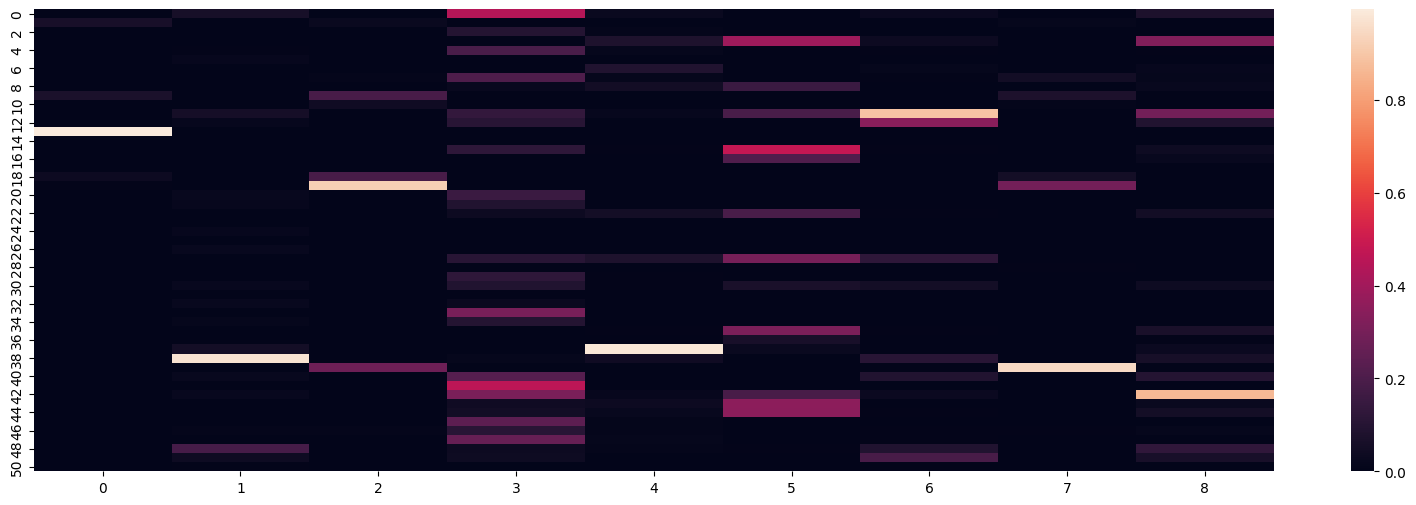

In [271]:
sns.heatmap(factor1[2])

<AxesSubplot: >

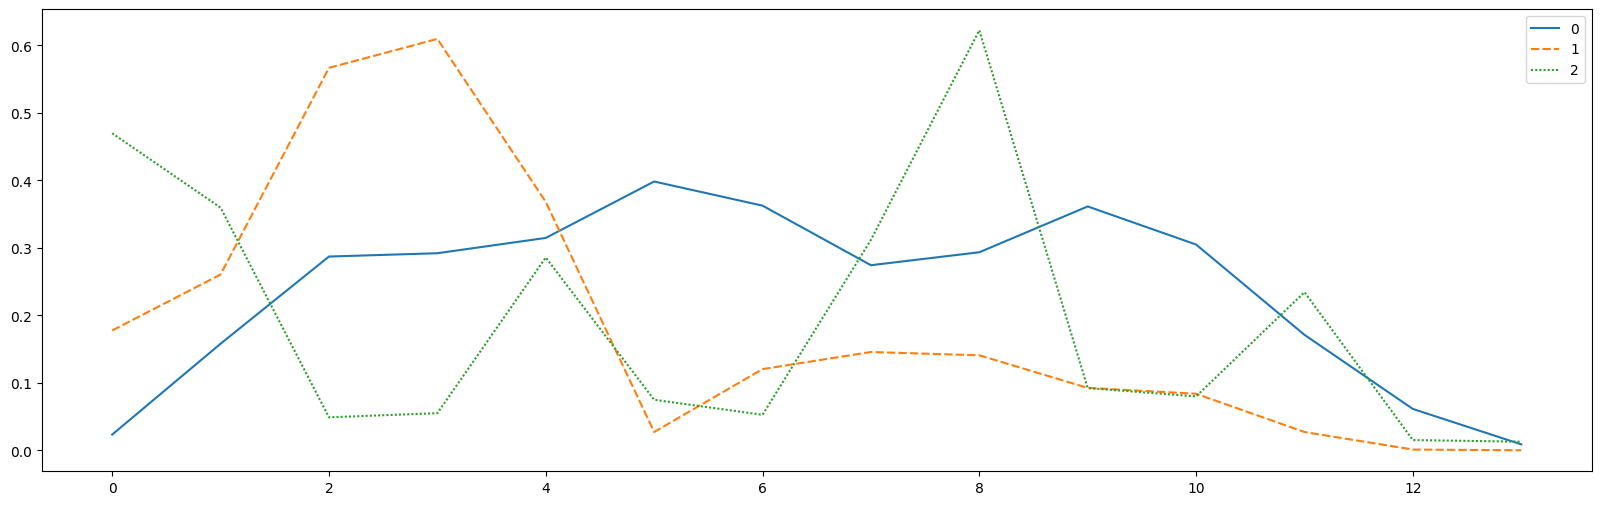

In [274]:
# sns.heatmap(factor1[0])
sns.lineplot(factor1[0])

In [133]:
# df_normal = np.linalg.norm(factor1[1])

<AxesSubplot: >

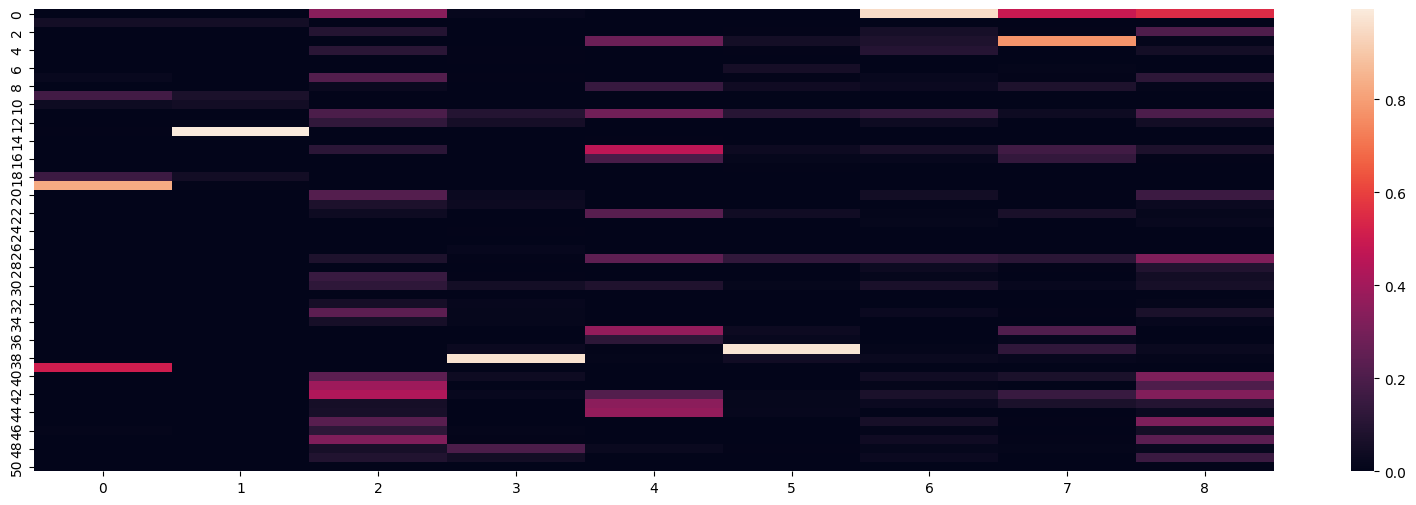

In [275]:
# factor1[1] = factor1[1]/df_normal
sns.heatmap(factor1[1])
# sns.lineplot(factor1[1])


<AxesSubplot: >

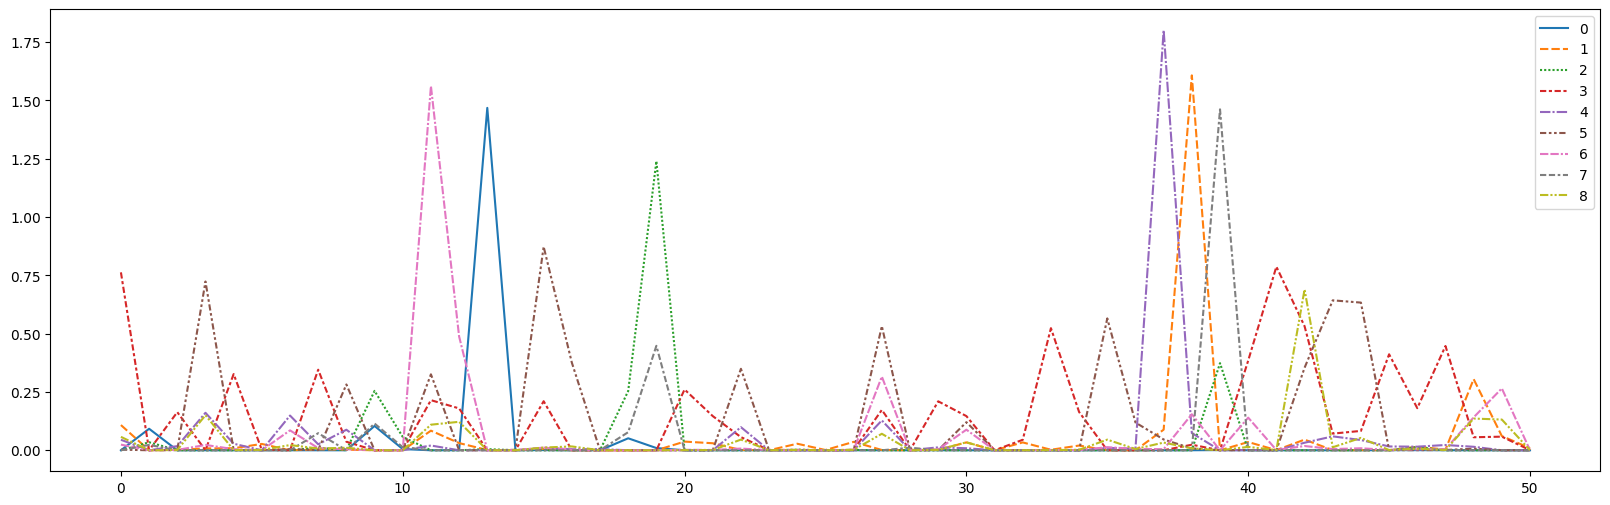

In [17]:
# sns.heatmap(factor1[2])
sns.lineplot(factor1[2])

### DAILY

In [290]:
tensor_final_2 = NTD_data_prepare(tensor_data,'DAILY')

C:\Users\HIMANGSHUB\AppData\Local\Temp\ipykernel_13700\3397584672.py:15: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



In [19]:
# rank_d = []
# rmse_d = []
# for r1 in range(2,10):
#     for r2 in range(2,10):
#         for r3 in range(2,10):
#             core1 , error = tucker(tensor_final_2,rank=[r1,r2,r3],return_errors=True)
#             tucker_reconstruction_mu = tl.tucker_to_tensor(core1)
#             er = RMSE(tensor_final_2, tucker_reconstruction_mu)
#             rmse_d.append(er)
#             rank_d.append( str(r1)+','+str(r2)+','+str(r3))

In [277]:
# dd = {'rank':rank_d , 'rmse':rmse_d}
# d = pd.DataFrame(dd)
# d = d.sort_values('rmse',ascending=False)
# d.tail(10)

In [280]:
d = optimised_rank(tensor_final_2)
core2 , factor2 = tucker(tensor_final_2,rank=[3,9,9],normalize_factors=True)
get_Core_factor(factor2,'data_final/factor0_daily.csv' , 'data_final/factor1_daily.csv' , 'data_final/factor2_daily.csv')

Text(0.5, 1.0, 'The lowest RMSE score rank is [3,9,9]')

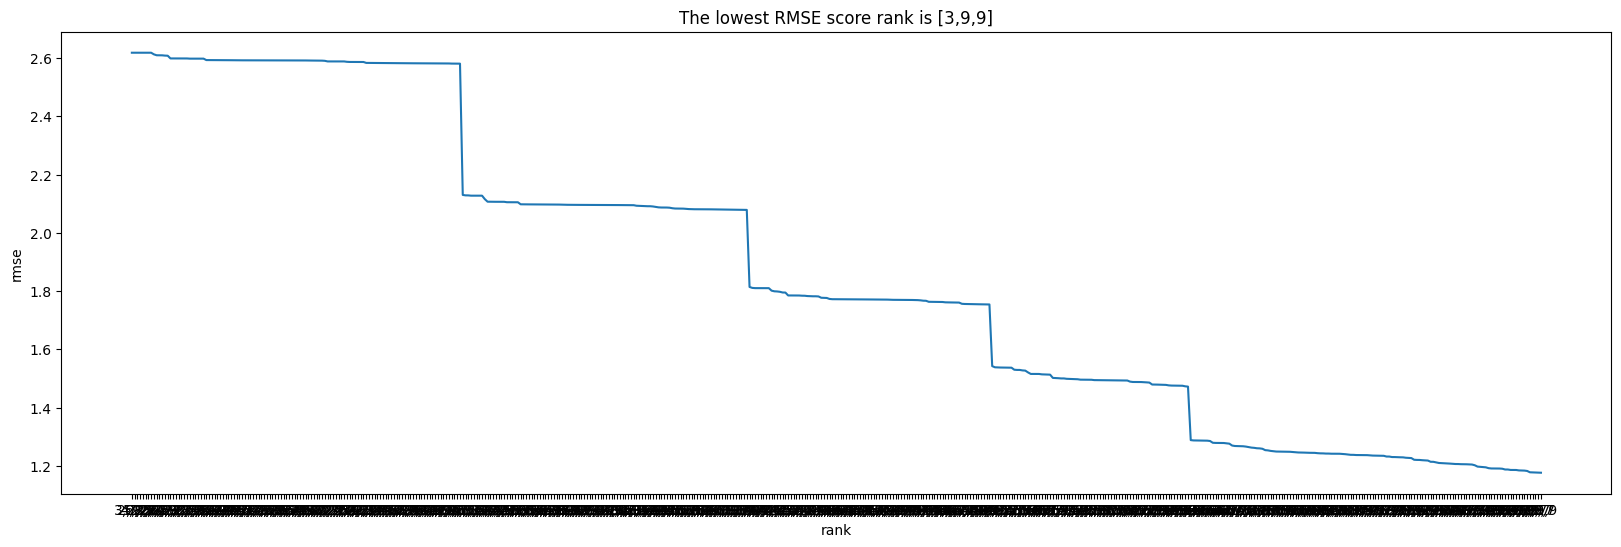

In [281]:
sns.lineplot(x=d['rank'] , y=d['rmse'])
plt.title("The lowest RMSE score rank is [3,9,9]")

In [184]:
# core2 , factor2 = tucker(tensor_final_2,rank=[3,9,9])

In [180]:
# core2.shape

(5, 9, 9)

In [278]:
# sum = 0
# sum1 = 0
# sum2 = 0
# for i in range(7):
#     for j in range(1):
#         sum = sum  + factor2[0][i][j]
#     for j in range(1,2):
#         sum1 = sum1  + factor2[0][i][j]
#     for j in range(2,3):
#         sum2 = sum2  + factor2[0][i][j]
# print(sum , sum1 , sum2) 

In [279]:
# factor2[0]

<AxesSubplot: >

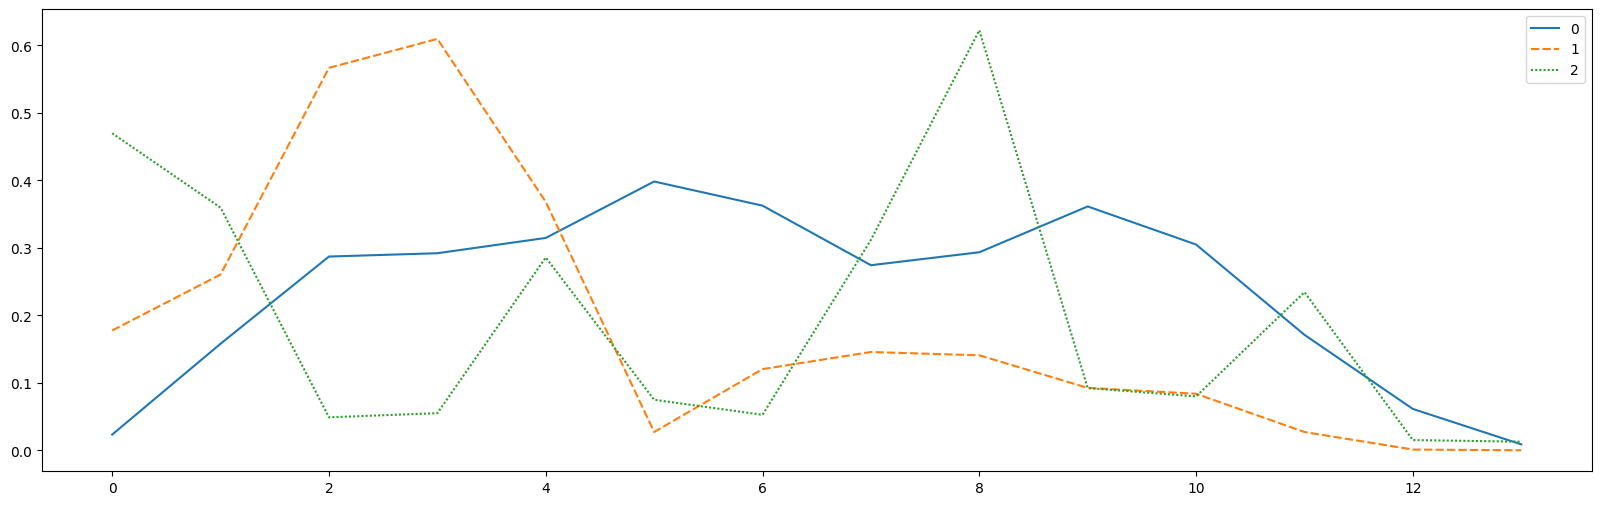

In [282]:
sns.lineplot(factor2[0])

<AxesSubplot: >

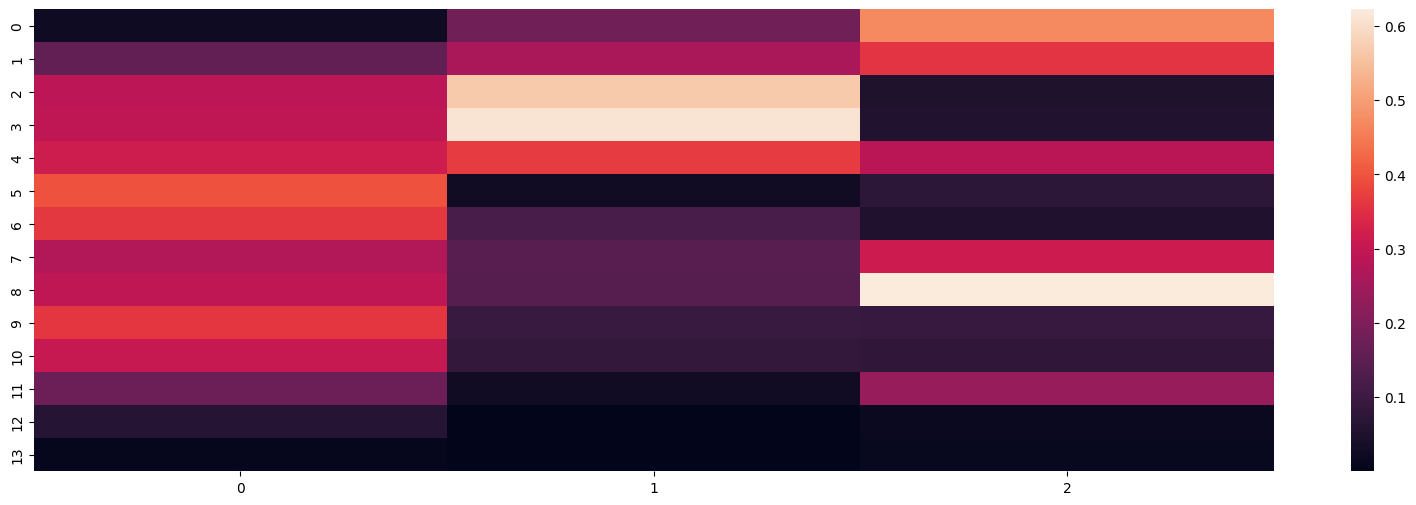

In [283]:
sns.heatmap(factor2[0])

<AxesSubplot: >

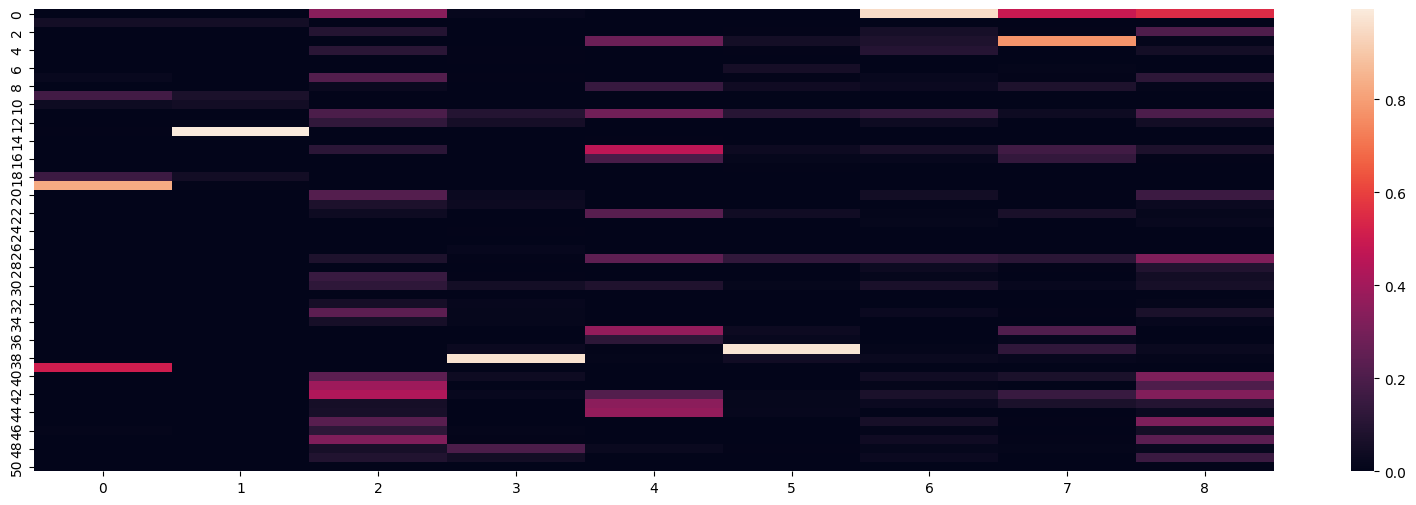

In [284]:
sns.heatmap(factor2[1])

<AxesSubplot: >

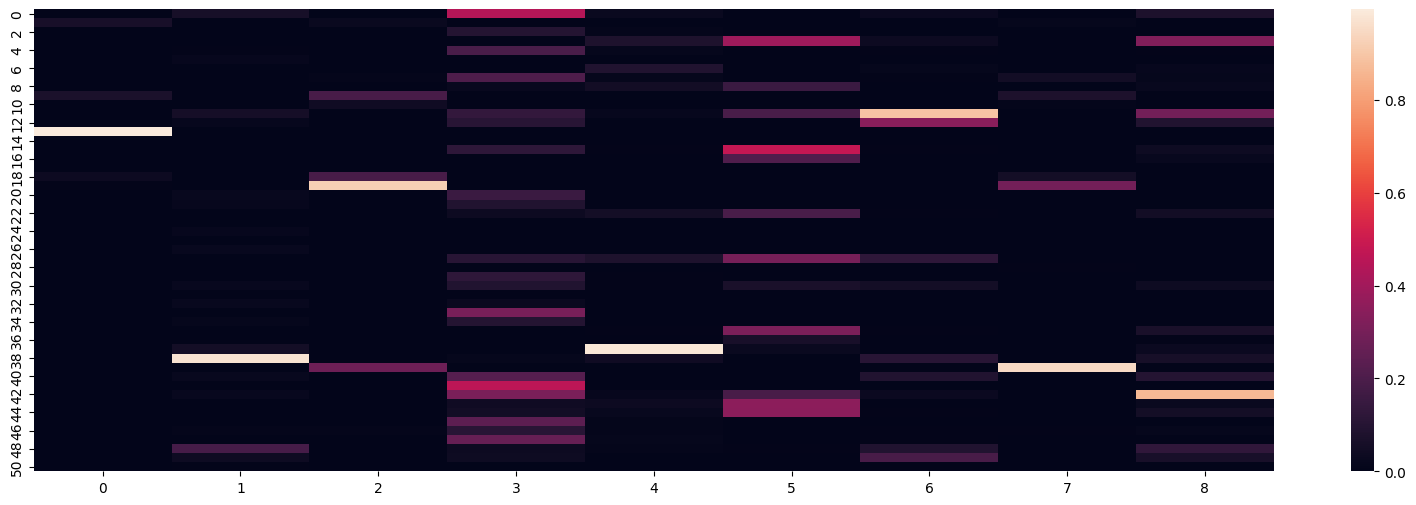

In [285]:
sns.heatmap(factor2[2])

<AxesSubplot: >

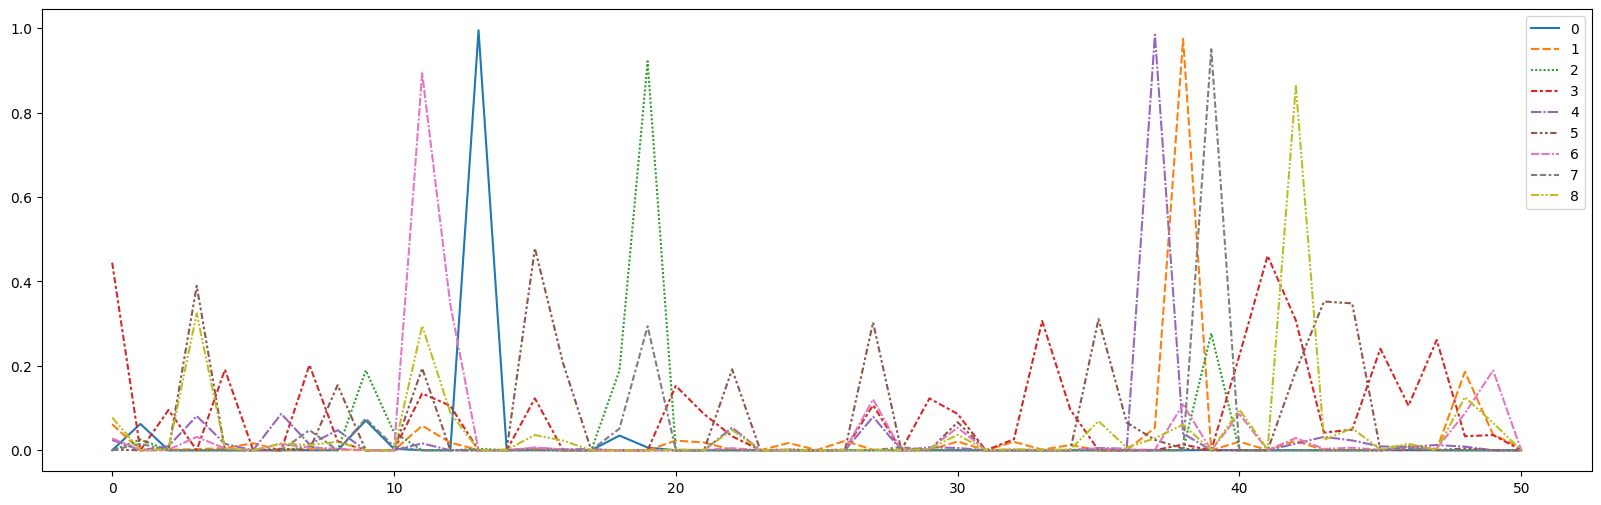

In [286]:
sns.lineplot(factor2[2])

### MONTHLY

In [288]:
tensor_final_3 = NTD_data_prepare(tensor_data,'MONTHLY')

C:\Users\HIMANGSHUB\AppData\Local\Temp\ipykernel_13700\3397584672.py:15: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



In [219]:
# rank_m = []
# rmse_m = []
# for r1 in range(2,6):
#     for r2 in range(2,10):
#         for r3 in range(2,10):
#             core1 , error = tucker(tensor_final_3,rank=[r1,r2,r3],return_errors=True,n_iter_max=100,tol=0.0001,normalize_factors=True)
#             tucker_reconstruction_mu = tl.tucker_to_tensor(core1)
#             er = RMSE(tensor_final_3, tucker_reconstruction_mu)
#             rmse_m.append(er)
#             rank_m.append( str(r1)+','+str(r2)+','+str(r3))

In [287]:
# dm = {'rank':rank_m , 'rmse':rmse_m}
# m = pd.DataFrame(dm)
# m = m.sort_values('rmse',ascending=False)
# m.tail(10)

In [289]:
m = optimised_rank(tensor_final_3)
core3 , factor3 = tucker(tensor_final_3,rank=[5,9,9],normalize_factors=True)
get_Core_factor(factor3,'data_final/factor0_monthly.csv' , 'data_final/factor1_monthly.csv' , 'data_final/factor2_monthly.csv')

Text(0.5, 1.0, 'The lowest RMSE score rank is [5,9,9]')

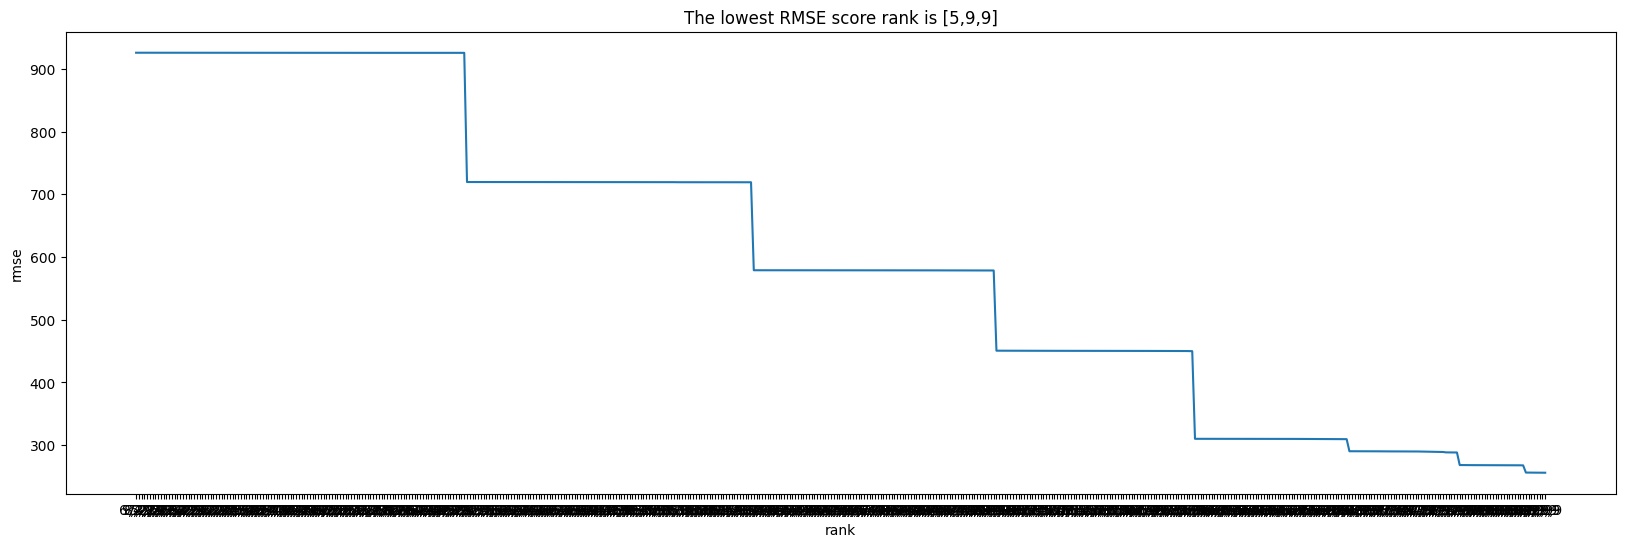

In [40]:
sns.lineplot(x=m['rank'] , y=m['rmse'])
plt.title("The lowest RMSE score rank is [5,9,9]")

In [231]:
core3 , factor3 = tucker(tensor_final_3,rank=[5,9,9])

In [232]:
core3.shape


(5, 9, 9)

<AxesSubplot: >

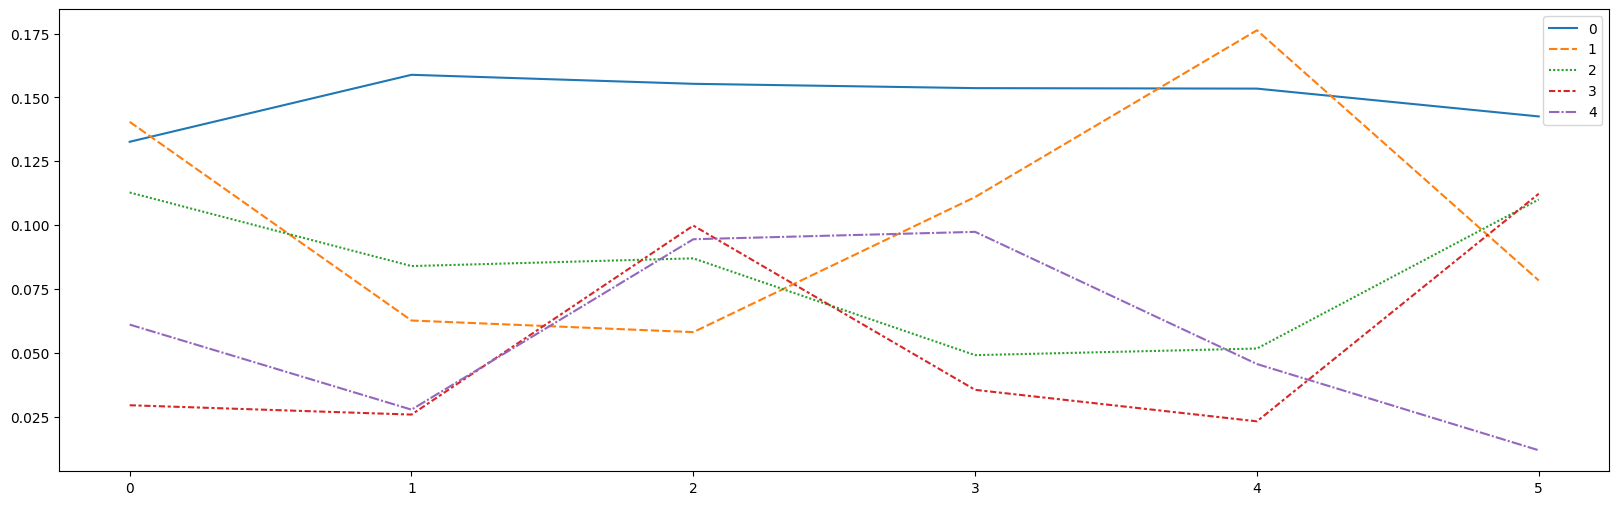

In [233]:
sns.lineplot(factor3[0])

<AxesSubplot: >

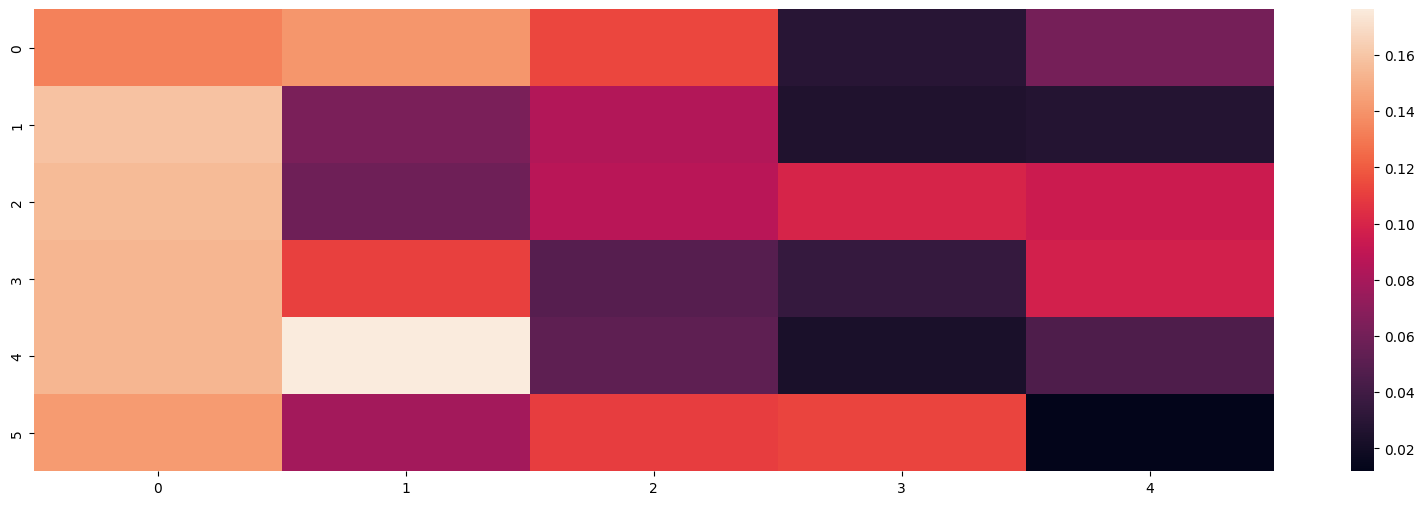

In [234]:
sns.heatmap(factor3[0])

<AxesSubplot: >

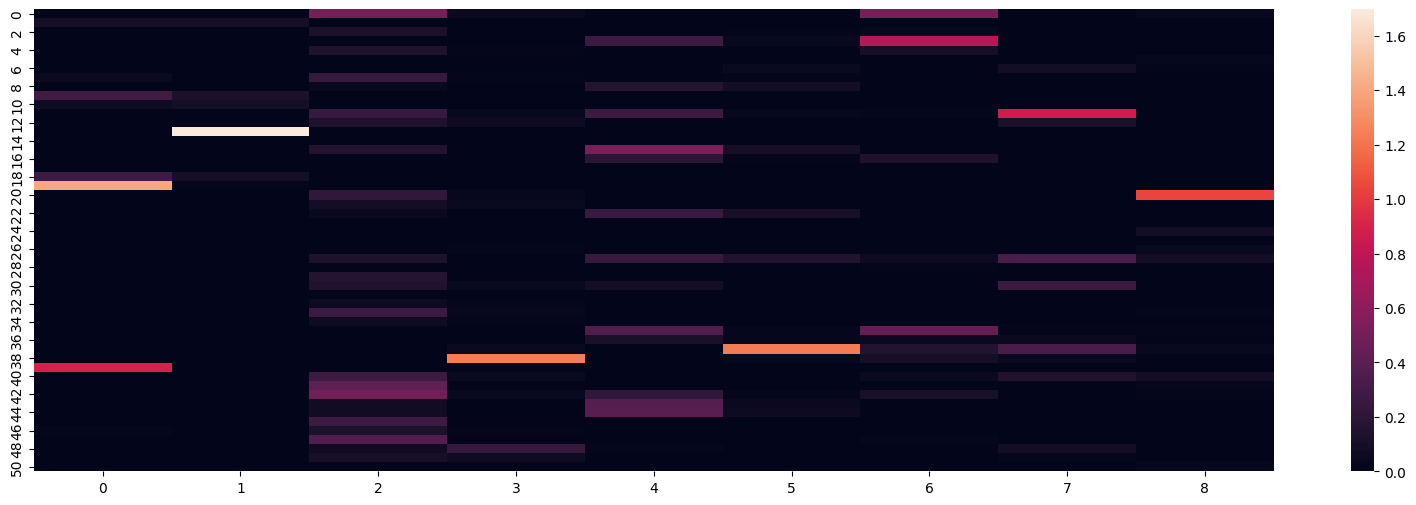

In [153]:
sns.heatmap(factor3[1])

<AxesSubplot: >

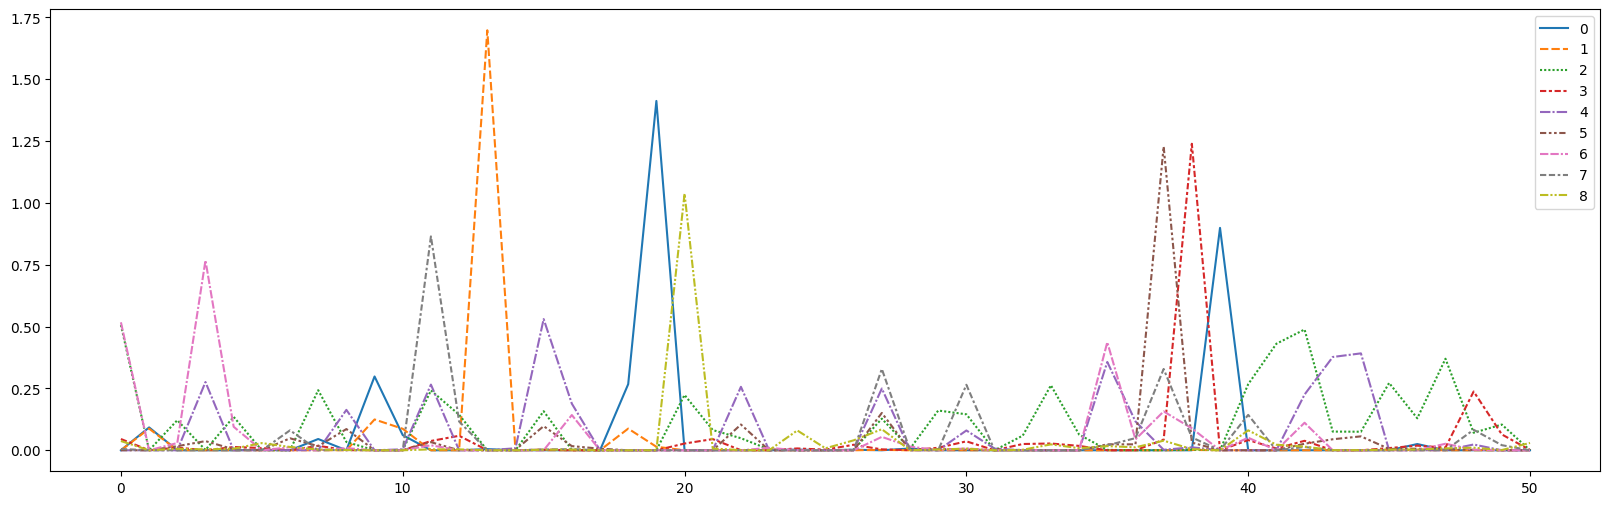

In [35]:
sns.lineplot(factor3[1])